In [2]:
%matplotlib inline

import numpy as np
import collections
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show 
import matplotlib.patches as patches    
from matplotlib import colors


import glob

import subprocess
from subprocess import call

import re

import pickle

from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [12]:
# open SET1 (PhyloSET) and SET2 (RiboSET)
PhyloSET = pd.read_csv('../tmp_res/SET1.txt', sep='\t')

RiboSET = pd.read_csv('../tmp_res/SET2.txt', sep='\t')
RiboSET['tr_id1'] = [x.split('.')[0] for x in RiboSET['tr_id'].tolist()]
RiboSET = RiboSET[(~RiboSET['Riboseq_Summary'].str.contains('ATG')) & 
                  (~RiboSET['tr_id'].str.contains('PAR'))]
print (RiboSET.shape[0])

390


In [4]:
# open metadata with scores and metrics
meta = pd.read_csv('../tmp_res/METADATA_CURRENT.txt', sep='\t')

# gencode 25
metadata_pc_g25 = pd.read_csv('../tmp_res/metadata_pc_g25.txt', sep='\t')

In [7]:
# genes from 2011 paper
genes_42 = 'RASL10B,FGFR1,YPEL2,ENOX2,UFSP1,WDR26,TIAL1,YPEL4,NGF,TRPV6,KCTD11,STARD10,YPEL1,R3HCC1,ZFP62,NHLRC4,EPHX3,C1QL4,TLE3,HDGF,ANKRD42,FAM217B,NFKBID,PTEN,RNF187,METTL23,TMEM8B,VANGL2,FNDC5,C1QL1,CITED1,EIF4G3,HELZ2,CYTH2,NTF3,MFSD4B,C1QL3,KCNN4,IFT46,RASD2,CITED2,C1QL2'.split(',')
genes_17 = 'GTF3A, EIF4G2, SP3, PRPS1L1, TEAD4, TEAD3, CACNG8, OAZ3, TEAD1, DDX17, VEGFA, NR1I2, HCK, WT1, BAG1, NPW, MYC'.split(', ')

In [8]:
ann_g35 = ['FNDC5', 'OAZ3', 'RNF187', 'SP3', 'NR1I2', 'TEAD3',
 'VEGFA', 'PRPS1L1', 'TRPV6', 'R3HCC1','MYC', 'BAG1',
 'EIF4G2', 'WT1', 'TEAD4', 'GTF3A', 'NPW', 'KCTD11', 'YPEL2',
 'NFKBID', 'CACNG8', 'HCK', 'YPEL1', 'DDX17']


In [9]:
remain = ['WDR26, ZFP62, PTEN, TIAL1, ANKRD42, C1QL1, HELZ2']

In [10]:
not_ann = list(set(genes_42+genes_17) - set(remain) - set(ann_g35))

In [13]:
phyloset_genes = list(PhyloSET.gene.unique())
riboset_genes = list(RiboSET.gene.unique())

In [14]:
from upsetplot import generate_data
from upsetplot import plot
from upsetplot import from_memberships

In [35]:
# ann not_ann diff_utr Ribo Phylo

example = from_memberships([
    ['ann_24'],
    ['un_28'],
    ['diff_utr'],
    ['Phylo'],
    ['Ribo'],
['Phylo', 'Ribo'],
['Phylo', 'ann_24'],
['Phylo', 'un_28'],
['Phylo', 'diff_utr'],
['Ribo', 'ann_24'],
['Ribo', 'un_28'],
['Ribo', 'diff_utr'],
['Phylo', 'Ribo', 'ann_24'],
['Phylo', 'Ribo', 'un_28'],
['Phylo', 'Ribo', 'diff_utr']],
data=[24, 28, 7, 60, 390, 8, 2, 4, 1, 0, 2, 0, 0, 1, 0])

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "height" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


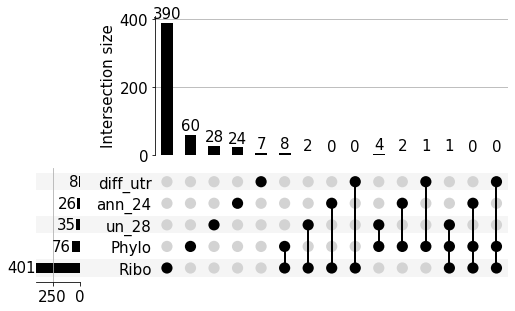

In [36]:
plt.rcParams.update({'font.size': 15})

plot(example, show_counts='%d')

plt.savefig('plots/upset_2011study', 
            format='svg', 
            width = 10,
            height = 10,
            dpi=1200, 
            bbox_inches="tight")


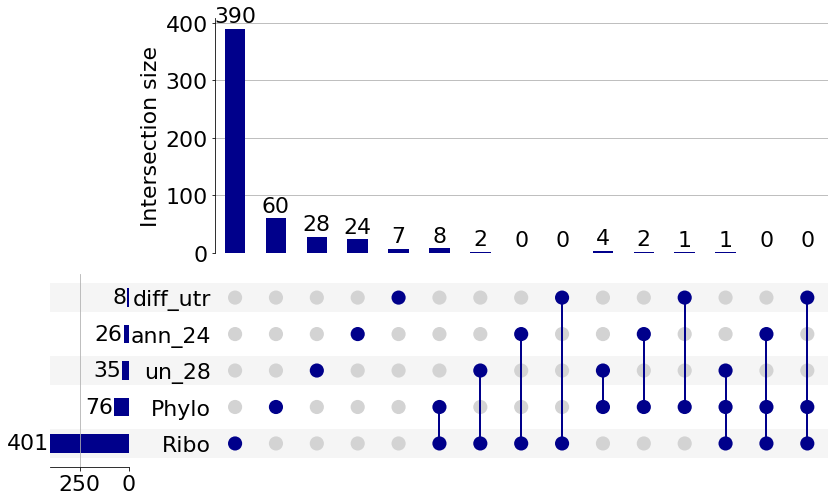

In [40]:
fig = plt.figure(figsize=(13.5, 8))

font = {'family' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

plot(example,show_counts='%d', 
     element_size=None, fig=fig,
    facecolor="darkblue")

plt.subplots_adjust(left=0.1, bottom=0.1,
                    wspace=0.1, hspace=0.1)

plt.show()

In [ ]:
a = 
b = 
c = 
d = 